In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
# 读取数据集
df = pd.read_csv(r"./data1-ForPCA.csv",
     sep=',',
     header=None).reset_index(drop=True)
df.columns = ['a','b']
df.dropna(how="all", inplace=True)
df.tail()

,a,b
995,1.349675,-1.492820
996,-0.934850,-1.966114
997,-2.544583,-4.381028
998,-0.322864,-0.506302
999,3.279953,8.624957


In [3]:
# 标准化
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 0:3].values
Y = df.iloc[:, 1].values
X_std = StandardScaler().fit_transform(X)

df = preprocessing.scale(df)
print(df)


[[-1.05539503 -1.09529999]
 [-0.61113269 -0.5650563 ]
 [-0.89806689 -1.06159913]
 ...
 [-0.96322155 -1.00679731]
 [-0.11668165 -0.1120771 ]
 [ 1.25609648  1.99643873]]


In [4]:
# 系数相关性矩阵
covX = np.around(np.corrcoef(df.T), decimals = 3)
# 系数相关矩阵特征求解
featValue, featVec=  np.linalg.eig(covX.T)
print(featValue, featVec)

[1.903 0.097] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [5]:
# 特征值排序输出
featValue = sorted(featValue)[::-1]

# 贡献度
gx = featValue / np.sum(featValue)

#累计贡献度
lg = np.cumsum(gx)
print(featValue, gx, lg)

[1.903, 0.09700000000000009] [0.9515 0.0485] [0.9515 1.    ]


In [6]:
# 选取主成分，一般要超过80%或85%
k = [i for i in range(len(lg)) if lg[i] < 0.85]
k = list(k)
print(k)

[]


In [65]:
# 主成分对应的特征向量矩阵
selectVec = np.matrix(featVec.T[k]).T
selectVe = selectVec*(-1)
print(selectVec)

# 表示主成分
finalData = np.dot(X_std, selectVec)
print(finalData)

[]
[]


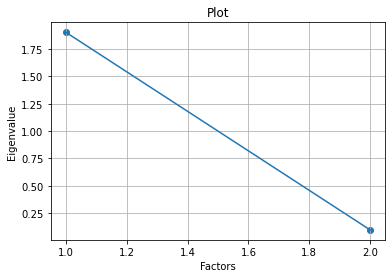

In [37]:
import matplotlib.pyplot as plt
# 绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), featValue)
plt.plot(range(1, df.shape[1] + 1), featValue)

plt.title("Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
 
plt.grid()
plt.show()
